Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                23050     
Total params: 42,442
Trainable params: 42,442
Non-trainable params: 0
__________________________________________________

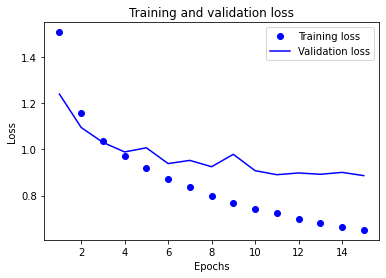

In [4]:
#使用 Keras 測試 Cifar-10 圖片資料集
from keras.datasets import cifar10

#讀取訓練資料跟測試資料

(x_train, y_train_), (x_test, y_test_) = cifar10.load_data()

#資料正規畫
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

from keras.utils import to_categorical

#訓練標籤跟測試標籤ont-hot-encoding
y_train = to_categorical(y_train_)
y_test = to_categorical(y_test_)

#建立模型

from keras.models import Sequential
model = Sequential()

from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

#瞄準區域
model.add(Conv2D(filters=32, 
                kernel_size=(3, 3),
                activation='relu',
                input_shape=(32, 32, 3)))

#尋找特徵
model.add(MaxPool2D())

model.add(Conv2D(filters=64,
                kernel_size=(3, 3),
                activation='relu'))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

#模型編譯
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

print(model.summary())

"""## Fitting"""

history = model.fit(x_train, y_train, batch_size=50, epochs=15, verbose=1, validation_data=(x_test, y_test))

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()